In [15]:
import numpy as np
import dill
import matplotlib.pyplot as plt
import matplotlib as mpl
import data_visualization as dv
from pathlib import Path
import pandas as pd    
import read_data_functions as rdf
import plot_functions as pf
from initializer import InitialThangs
import Statistics as st
import constants
import pingouin as pg
# import viper as vp
%load_ext autoreload
%autoreload 2
pd.set_option('display.max_columns', None)

EXPERIMENT = "Exp1"
plt.style.use('C:/Users/Seth Sullivan/anaconda3/Lib/site-packages/matplotlib/mpl-data/stylelib/cashaback_dark.mplstyle')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
EXPERIMENT = "Exp1"
plt.style.use('C:/Users/Seth Sullivan/anaconda3/Lib/site-packages/matplotlib/mpl-data/stylelib/cashaback_light.mplstyle')
wheel = dv.ColorWheel()

# Get path and save path 
DATA_PATH = Path(rf"D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\results")
SAVE_PATH = Path(rf"D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\paper\figures")
it = InitialThangs(EXPERIMENT)

# Data

In [17]:
# if "group" not in locals():
#     group = rdf.generate_subject_object_v3(EXPERIMENT, "All Trials", movement_metric_type='position')
# else:
#     if group.exp_info.experiment != EXPERIMENT:  # This means i changed experiment and need to run again
#         group = rdf.generate_subject_object_v3(EXPERIMENT, "All Trials")

# if "group2" not in locals():
#     group2 = rdf.generate_subject_object_v3("Exp2", "All Trials", movement_metric_type='position')
# else:
#     if group2.exp_info.experiment != "Exp2":  # This means i changed experiment and need to run again
#         group2 = rdf.generate_subject_object_v3("Exp2", "All Trials")

with open(constants.MODEL_INPUT_PATH / 'bootstrap_parameter_distribution.pkl','rb') as f:
    parameter_distribution = dill.load(f)    
#* Comparison Targets load
with open(constants.MODEL_INPUT_PATH / 'participant_median_movement_onset_time.pkl','rb') as f:
    participant_median_movement_onset_time = dill.load(f)
with open(constants.MODEL_INPUT_PATH / 'participant_sd_movement_onset_time.pkl','rb') as f:
    participant_sd_movement_onset_time = dill.load(f)
with open(constants.MODEL_INPUT_PATH / 'participant_wins.pkl','rb') as f:
    participant_wins = dill.load(f)  
participant_perc_wins = (participant_wins/it.num_trials)*100
with open(constants.MODEL_INPUT_PATH / 'participant_incorrects.pkl','rb') as f:
    participant_incorrects = dill.load(f)  
participant_perc_incorrects = (participant_incorrects/it.num_trials)*100

with open(constants.MODEL_INPUT_PATH / 'participant_indecisions.pkl','rb') as f:
    participant_indecisions = dill.load(f)  
participant_perc_indecisions = (participant_indecisions/it.num_trials)*100

with open(r'D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\results\participant_data\Exp1_stats_df.pkl', "rb") as f:
    df = dill.load(f)
    

In [18]:
df

,Subject,Condition,Factor_1,Factor_2,Median_Movement_Onset_Time,Median_Movement_Time,Wins,Indecisions,Incorrects,Correct_Decisions,Wins_When_Both_Decide,Median_Gamble_Movement_Onset_Time,SD_Movement_Onset_Time,Q1_Movement_Onset_Time,Q3_Movement_onset_time,Reaction_Decisions,Gamble_Decisions,Points
0,1,1,1000,50,1149.5,183.0,58.75,3.75,37.50,48.75,61.038961,1259.0,92.573814,1071.75,1196.00,26.25,73.75,0.0
1,1,2,1000,150,1166.5,202.0,70.00,17.50,12.50,60.00,84.615385,1188.5,101.211547,1063.50,1219.00,42.50,57.50,0.0
2,1,3,1100,50,1215.0,195.0,53.75,16.25,30.00,63.75,64.179104,1315.0,154.859838,1099.25,1289.50,33.75,66.25,0.0
3,1,4,1100,150,1120.0,188.0,53.75,5.00,41.25,51.25,53.521127,1129.0,122.806199,1057.25,1184.25,12.50,87.50,0.0
4,1,5,1200,50,1112.5,194.0,42.50,3.75,53.75,45.00,44.155844,NaN,135.230997,1017.75,1192.00,0.00,100.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,20,2,1000,150,912.5,277.0,50.00,8.75,41.25,51.25,54.166667,1115.0,206.828841,796.75,1041.00,11.25,88.75,0.0
116,20,3,1100,50,1033.5,255.0,47.50,13.75,38.75,56.25,55.072464,1298.0,159.593623,920.50,1155.00,11.25,88.75,0.0
117,20,4,1100,150,1002.5,253.5,51.25,13.75,35.00,55.00,58.823529,1210.0,189.881132,903.75,1168.75,17.50,82.50,0.0
118,20,5,1200,50,1001.0,268.5,43.75,8.75,47.50,48.75,47.945205,1419.5,182.333856,842.25,1094.75,2.50,97.50,0.0


# Stats

In [24]:
#* Get dataframe and create the stats inputs
# TODO LOAD IN THE DATAFRAME FROM The new df I just created

exp1_stats_df = pd.read_pickle(DATA_PATH / "participant_data" / "Exp1_stats_df.pkl") 
exp1_anova_df = pd.read_pickle(DATA_PATH / "participant_data" / "Exp1_anova_df.pkl") 
exp1_pvals_df = pd.read_pickle(DATA_PATH / "participant_data" / "Exp1_pvals_df.pkl") 
exp1_cles_df  = pd.read_pickle(DATA_PATH / "participant_data" / "Exp1_cles_df.pkl") 

exp2_stats_df = pd.read_pickle(DATA_PATH / "participant_data" / "Exp2_stats_df.pkl") 
exp2_anova_df = pd.read_pickle(DATA_PATH / "participant_data" / "Exp2_anova_df.pkl") 
exp2_pvals_df = pd.read_pickle(DATA_PATH / "participant_data" / "Exp2_pvals_df.pkl") 
exp2_cles_df  = pd.read_pickle(DATA_PATH / "participant_data" / "Exp2_cles_df.pkl") 
exp2_pvals_df

,Metric,Collapsed,01,02,13,23
0,Reaction_Time_Median,NaN,0.0,0.045168,0.0,0.036995
1,Reaction_Time_SD,react_guess,0.0,NaN,NaN,NaN
2,Reaction_Time_IQR,NaN,0.0,0.000006,0.0,0.000000


# Plotting Constants

In [20]:
collapse_colors = [
    wheel.blend_colors(constants.xticklabel_colors_means[0],constants.xticklabel_colors_means[3]),
    wheel.blend_colors(constants.xticklabel_colors_means[1],constants.xticklabel_colors_means[4]),
    wheel.blend_colors(constants.xticklabel_colors_means[2],constants.xticklabel_colors_means[5])
]

In [21]:


def df_to_array(df_col, num_subjects, num_blocks):
    ans = np.array(df_col).reshape(num_subjects, num_blocks)
    return ans

def collapse_across(arr, conditions:str):
    '''
    conditions: 'means' or 'sds'
    '''
    if conditions == "means":
        new_arr = np.vstack((
            np.concatenate((arr[:,0], arr[:,1])),
            np.concatenate((arr[:,2], arr[:,3])),
            np.concatenate((arr[:,4], arr[:,5]))
            )
        ).T
    else:
        new_arr = np.vstack((
            np.concatenate((arr[:,0], arr[:,2], arr[:,4])),
            np.concatenate((arr[:,1], arr[:,3], arr[:,5]))
            )
        ).T
    return new_arr

def get_combos(condition_nums=None, experiment="Exp1"):
    def _check_parity(combo):
        a = int(combo[0])
        b = int(combo[1])
        if a % 2 == b % 2:
            return True
        else:
            return False

    # * If not collapsing, then go through every combination
    if condition_nums is None:
        # But only want across the means, don't care about main effects of std
        if experiment == "Exp1":
            condition_nums = ["0", "1", "2", "3", "4", "5"]
            # Only take the even conditions together and the odd conditions together
            combos_ = [
                "".join(map(str, comb)) for comb in combinations(condition_nums, 2)
            ]  # Creates list of unique combos, order doesn't matter
            combos = [c for c in combos_ if _check_parity(c)]

        # Want every combo for exp2
        elif experiment == "Exp2":
            condition_nums = ["0", "1", "2", "3"]
            combos = [
                "".join(map(str, comb)) for comb in combinations(condition_nums, 2)
            ]  # Creates list of unique combos, order doesn't matter
    else:
        combos = ["".join(map(str, comb)) for comb in combinations(condition_nums, 2)]  # Creates list of unique combos, order doesn't matter
    return combos

def pairwise_bootstrap(data, combos, alternative ="two-sided", M=1e6, test="mean", experiment="Exp1"):
    '''
    
    '''
    
    def _get_alternative_dict(combos):
        if experiment == "Exp1":
            if alternative == "variable":
                alternative_dict = {"02": "less", "04": "greater", "24": "greater", "13": "less", "15": "greater", "35": "greater"}
            else:
                alternative_dict = dict(zip(combos, [alternative] * len(combos)))
        else:
            alternative_dict = dict(zip(combos, [alternative] * len(combos)))
        #* Return one-liner filters the dictionary to only include the combos I've passed, necessary for variable alternative dict
        return {x: alternative_dict[x] for x in alternative_dict.keys() if x in combos}
            
    alternative_dict = _get_alternative_dict(combos)
    # if self.experiment == 'Exp1':
    pvals = {}
    cles1 = {}
    cles2 = {}
    c = -1
    for combo in combos:
        c += 1
        print(combo)
        i = int(combo[0])
        j = int(combo[1])
        pvals.update({combo:au.bootstrap(data[:, i], data[:, j], paired=True, 
                                            M=M, alternative=alternative_dict[combo], 
                                            test=test)})
        cles1.update({combo:au.cles(data[:, i], data[:, j], paired=True)}) 
        cles2.update({combo:au.cles(data[:, j], data[:, i], paired=True)}) 

    # Create array and do holm bonferroni
    print(pvals)
    pvals_corrected = au.holmbonferroni_correction(np.array(list(pvals.values())))
    pvals_corrected_dict = dict(zip(combos,pvals_corrected))
    
    cles_dict = {}
    for (k1,v1),(k2,v2) in zip(cles1.items(),cles2.items()):
        if v1>v2:
            cles_dict.update({k1:v1})
        else:
            cles_dict.update({k2:v2})
    
    return pvals_corrected_dict, cles_dict

In [22]:
anova = pg.rm_anova(
                data=df, dv="Median_Movement_Onset_Time", 
                within=["Factor_1", "Factor_2"], 
                subject="Subject", detailed=True
            )
combos = get_combos()
median_movement_onset_time = df_to_array(df['Median_Movement_Onset_Time'], 
                                         num_subjects=20, num_blocks=6)

collapsed_median_movement_onset_time = collapse_across(median_movement_onset_time,"means")

median_movement_onset_statistics = pairwise_bootstrap(
                                        data = collapsed_median_movement_onset_time,
                                        combos = ['01','02','12'],  
                                        alternative="two-sided",
                                        test='mean'
                                    )


NameError: name 'combinations' is not defined

# Data Figure

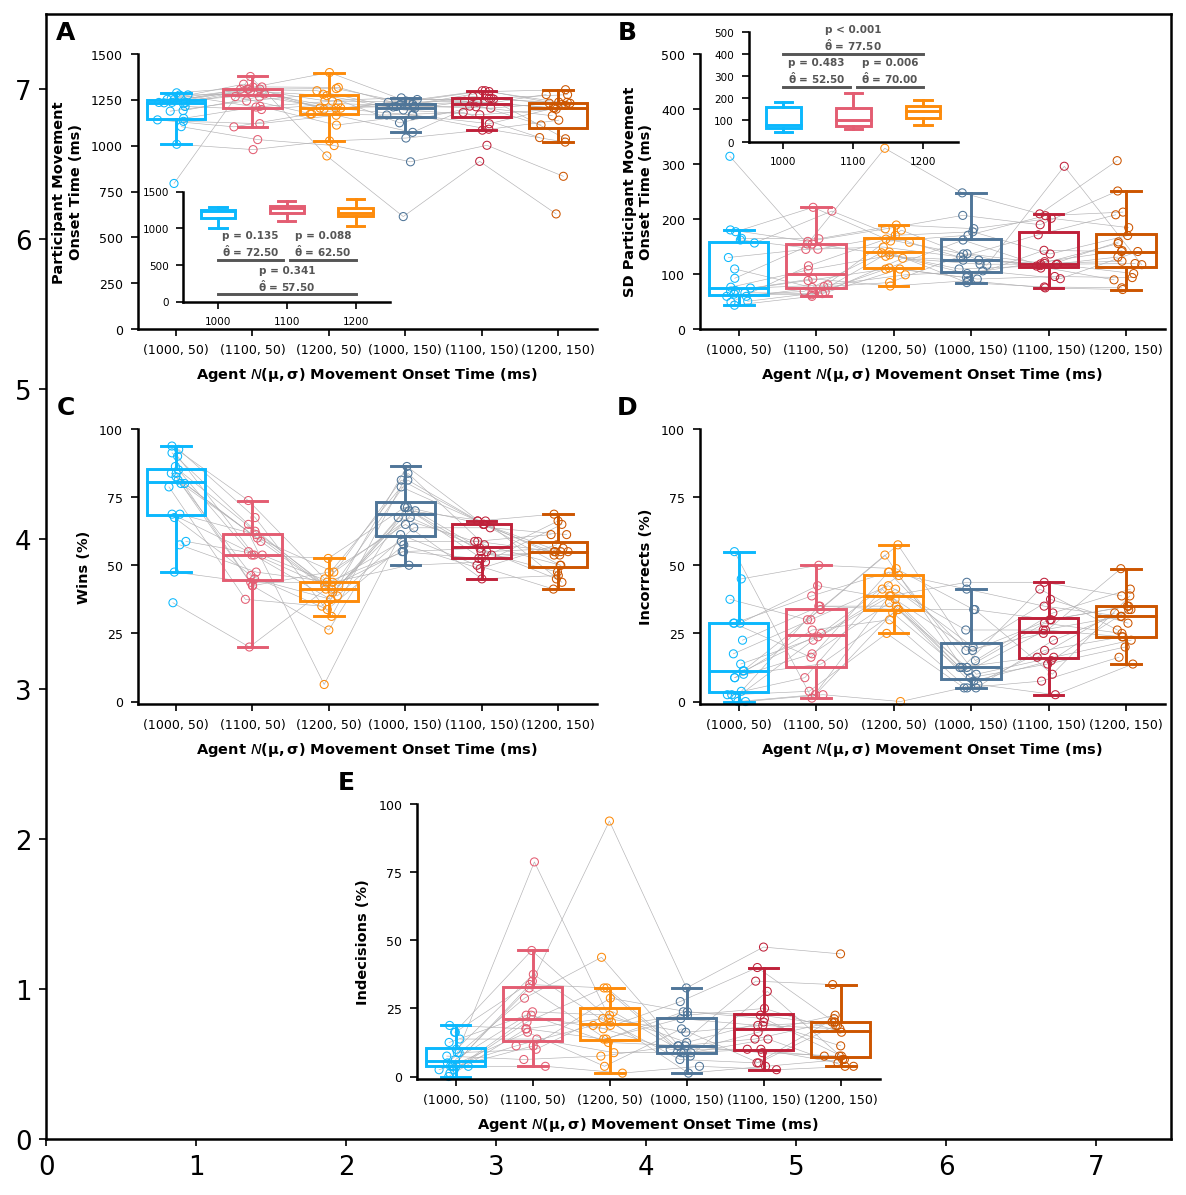

In [ ]:

save_path = Path(
    r"D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\results\figures"
)
w, h = 7.5, 7.5
bw = (
    0.35 * w
) / it.num_blocks  # box widths of all boxes combined takes up 30% of the width
div_w = 2.3
xlocs = np.linspace(0, w / div_w, num=len(it.trial_block_titles))
legend_fontsize = 5
ticklabel_fontsize = 6
suptitle_fontsize = 6
label_fontsize = 7
markersize = 15

metrics = np.array(
    [
        participant_median_movement_onset_time,
        participant_sd_movement_onset_time,
        participant_perc_wins,
        participant_perc_incorrects,
        participant_perc_indecisions,
    ]
)[:, :, [0, 2, 4, 1, 3, 5]]  # Rearranging axes to get the order I want
ylocs = (
    [np.arange(0, 1501, 250)] + [np.arange(0, 501, 100)] + [np.arange(0, 101, 25)] * 3
)
ylabels = [
    "Participant Movement\nOnset Time (ms)",
    "SD Participant Movement\nOnset Time (ms)",
    "Wins (%)",
    "Incorrects (%)",
    "Indecisions (%)",
]
ylims = [(0, 1500)] + [(0, 500)] + [(-1, 100)] * 3

model_labels = ["Base Model", "Optimal Model", "Suboptimal Model"]
# save_names = ["exp1_results_only_optimal_model", 'exp1_results_both_models','exp1_results_statistics',]
suptitles = ["Model Results", "Model Results", "Participant Behaviour"]
legend_locs = (0.58, 0.86)
mosaic = "aabb;ccdd;.ee."
fig = pf.NewFigure(mosaic, dpi=150, figsize=(w, h),wspace=None, hspace=None)
axs = list(fig.axes.values())
model_colors = [wheel.grey, wheel.dark_grey, wheel.black]
figure_statistics = [median_movement_onset_statistics,sd_movement_onset_statistics,
                     indecisions_statistics,
                     wins_statistics, incorrects_statistics]
# * Looping axes for each metric
for i, ax in enumerate(axs):
    # * Looping each experimental condition
    for j in range(len(xlocs)):
        dv.boxplot(
            ax,
            xlocs[j],
            metrics[i, :, j],
            color=constants.xticklabel_colors_means[j],
            data_color=constants.xticklabel_colors_means[j],
            box_lw=1.4
        )

    dv.jitter_array(ax=ax,x_positions=xlocs,data=metrics[i,:,:].T,
                    data_color = constants.xticklabel_colors_means,
                    data_edge_color = wheel.lighten_color(wheel.light_grey,1.0),
                    noise_scale=0.06, include_mean = False, circle_size=markersize)

    ax.set_ylim(ylims[i])
    ax.set_xlim(min(xlocs) - 0.75*bw, max(xlocs) + 0.75*bw)
    ax.set_xticks(xlocs, labels=constants.xticklabels, fontsize=ticklabel_fontsize)
    ax.set_yticks(ylocs[i], labels=ylocs[i], fontsize=ticklabel_fontsize)
    ax.set_xlabel(it.xlabel, fontsize=label_fontsize)
    ax.set_ylabel(ylabels[i], fontsize=label_fontsize)
    # dv.legend(ax, labels=model_labels, colors=model_colors,fontsize=legend_fontsize)
    # [ticklabel.set_color(color) for (color,ticklabel) in zip(constants.xticklabel_colors_means,ax.xaxis.get_ticklabels())]
    if i == 0:

        inset_ax = ax.inset_axes((0.1,0.1,0.45,0.4))
        inset_xlocs = np.linspace(1.5,3.5,num=3)
        for j in range(len(inset_xlocs)):
            dv.boxplot(
                inset_ax,
                inset_xlocs[j],
                metrics[i, :, j],
                color=constants.xticklabel_colors_means[j],
                data_color=constants.xticklabel_colors_means[j],
                box_lw=1.4
            )
        pf.plot_stats(
            inset_ax,stats_inputs=stats_inputs, statistics=figure_statistics[i],
            combos = ['01','12','02',],
            xpositions = [[inset_xlocs[0],inset_xlocs[1]-0.05], 
                        [inset_xlocs[1]+0.05, inset_xlocs[2]],
                        [inset_xlocs[0],inset_xlocs[2]]],
            ypos=[575,575,100,],
            stacked=True,
            show_effectsize=True,
            lw = 1.4, 
            h = 16,
            fontsize=5,
            shorten_length=True,
            color = wheel.lighten_color(wheel.dark_grey,1.2),
        )
        inset_ax.set_xticks(inset_xlocs, labels=["1000", "1100", "1200"], fontsize=5)
        inset_ax.set_yticks([0,500,1000,1500], labels = [0,500,1000,1500], fontsize=5)
        inset_ax.set_xlim(1.0,4)
        inset_ax.set_ylim(0,1500)
    if i == 1:

        inset_ax = ax.inset_axes((0.105,0.68,
                                  0.45,0.4))
        inset_xlocs = np.linspace(1.5,3.5,num=3)
        for j in range(len(inset_xlocs)):
            dv.boxplot(
                inset_ax,
                inset_xlocs[j],
                metrics[i, :, j],
                color=constants.xticklabel_colors_means[j],
                data_color=constants.xticklabel_colors_means[j],
                box_lw=1.4
            )
        pf.plot_stats(
            inset_ax,stats_inputs=stats_inputs, statistics=figure_statistics[i],
            combos = ['01','12','02',],
            xpositions = [[inset_xlocs[0],inset_xlocs[1]-0.05], 
                        [inset_xlocs[1]+0.05, inset_xlocs[2]],
                        [inset_xlocs[0],inset_xlocs[2]]],
            ypos=[250,250,400,],
            stacked=True,
            show_effectsize=True,
            lw = 1.4, 
            h = 6,
            fontsize=5,
            shorten_length=True,
            color = wheel.lighten_color(wheel.dark_grey,1.2),
        )
        inset_ax.set_xticks(inset_xlocs, labels=["1000", "1100", "1200"], fontsize=5)
        inset_ax.set_yticks(np.arange(0,501,100), labels = np.arange(0,501,100), fontsize=5)
        inset_ax.set_xlim(1.0,4)
        inset_ax.set_ylim(0,500)
    
    
fig.add_all_letters()
# fig.pad_fig(w_pad=-2,h_pad=0,w_space=-2,h_space=0.1)
for ax_label in ["a","b","c", "d"]:
    if ax_label in ["b","d"]:
        fig.adjust_position(fig.axes[ax_label], (-0.1, 0))
    fig.adjust_size(fig.axes[ax_label], (0.1, 0))
# plt.subplots_adjust(right=0.8)
# plt.subplot_tool()
plt.show()
fig.savefig(SAVE_PATH / "test.png")

In [ ]:
inset_xlocs

array([1.5, 2.5, 3.5])

# Data With Models

In [ ]:
save_path = Path(
    r"D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\results\figures"
)
w, h = 7.5, 6
bw = (
    0.35 * w
) / it.num_blocks  # box widths of all boxes combined takes up 30% of the width
mult_w, div_w = 0.053, 2.3
div_h = 1.75
xlocs = np.linspace(0, w / div_w, num=len(it.trial_block_titles))
legend_fontsize = 5
ticklabel_fontsize = 6
suptitle_fontsize = 6
label_fontsize = 7
markersize = 0.1*(w*h)

metrics = np.array(
    [
        np.nanmedian(group.movement_metrics.movement_onset_times("task"),2),
        np.nanstd(group.movement_metrics.movement_onset_times("task"),2),
        group.score_metrics.score_metric("wins"),
        group.score_metrics.score_metric("incorrects"),
        group.score_metrics.score_metric("indecisions"),
    ]
)[
    :, :, [0, 2, 4, 1, 3, 5]
]  # Rearranging axes to get the order I want
ylocs = (
    [np.arange(0, 1751, 250)] + [np.arange(0, 401, 100)] + [np.arange(0, 101, 25)] * 3
)
ylabels = [
    "Participant Movement\nOnset Time (ms)",
    "SD Participant Movement\nOnset Time (ms)",
    "Wins (%)",
    "Incorrects (%)",
    "Indecisions (%)",
]
ylims = [(0, 1750)] + [(0, 400)] + [(0, 100)] * 3

model_labels = ["Base Model", "Optimal Model", "Suboptimal Model"]
# save_names = ["exp1_results_only_optimal_model", 'exp1_results_both_models','exp1_results_statistics',]
suptitles = ["Model Results", "Model Results", "Participant Behaviour"]
legend_locs = (0.58, 0.86)
median_dicts = [base_medians, optimal_medians, suboptimal_medians]
interval_dicts = [base_intervals, optimal_intervals, suboptimal_intervals]

mosaic = "aabb;ccdd;.ee."
fig = pf.NewFigure(mosaic, dpi=300, figsize=(w, h),wspace=None, hspace=None)
axs = list(fig.axes.values())
model_colors = [wheel.grey, wheel.dark_grey, wheel.black]
# * Looping axes for each metric
for i, (ax, col_name) in enumerate(zip(axs, col_names)):
    # * Looping each experimental condition
    for j in range(len(xlocs)):
        dv.boxplot(
            ax,
            xlocs[j],
            metrics[i, :, j],
            color=constants.xticklabel_colors_means[j],
            data_color=constants.xticklabel_colors_means[j],
            box_lw=1.4
        )
        for k, (model_medians, model_intervals) in enumerate(
            zip(median_dicts, interval_dicts)
        ):
            if k == 0:
                shift = -bw / 3
            if k == 1:
                shift = +bw / 3
            pf.plot_boostrapped_model_results(
                ax,
                xlocs[j] + shift,
                y=model_medians[col_name][j],
                percentiles=model_intervals[col_name][:, j],
                horizontal_lw=0,
                markersize=markersize,
                color=model_colors[k],
            )

    # dv.jitter_array(ax=ax,x_positions=xlocs,data=metrics[i,:,:].T,
    #                 data_color = constants.xticklabel_colors_means,
    #                 data_edge_color = wheel.lighten_color(wheel.light_grey,1.2),
    #                 noise_scale=0.06, include_mean = False, circle_size=40)

    ax.set_ylim(ylims[i])
    ax.set_xlim(min(xlocs) - 0.75*bw, max(xlocs) + 0.75*bw)
    ax.set_xticks(xlocs, labels=constants.xticklabels, fontsize=ticklabel_fontsize)
    ax.set_yticks(ylocs[i], labels=ylocs[i], fontsize=ticklabel_fontsize)
    ax.set_xlabel(it.xlabel, fontsize=label_fontsize)
    ax.set_ylabel(ylabels[i], fontsize=label_fontsize)
    dv.legend(ax, labels=model_labels, colors=model_colors,fontsize=legend_fontsize)
    [ticklabel.set_color(color) for (color,ticklabel) in zip(constants.xticklabel_colors_means,ax.xaxis.get_ticklabels())]

fig.add_all_letters()
fig.fig.facecolor = 1
# fig.pad_fig(w_pad=-2,h_pad=0,w_space=-2,h_space=0.1)
for ax_label in ["a","b","c", "d"]:
    if ax_label in ["b","d"]:
        fig.adjust_position(fig.axes[ax_label], (-0.1, 0))
    fig.adjust_size(fig.axes[ax_label], (0.1, 0))
# plt.subplots_adjust(right=0.8)
# plt.subplot_tool()
plt.show()
fig.savefig(SAVE_PATH / "test.png")

NameError: name 'group' is not defined